# Python Project

**Hotel**

The program must present and display a report of the result obtained, showing for
each strategy the number of customers accommodated, the number of rooms occupied, the
number of different hotels occupied, the total volume of business (total earnings of each
hotel), and the degree of customer satisfaction (calculated according to the location of the
hotel assigned to them with respect to their preferences).
I will use 4 differents strategies:
**1-random**
**2-customer preference**
**3-price**
**4-availability**

# Random:
customers are randomly distributed to the rooms until the seats or customers
are exhausted.


In [ ]:
# importo tutte le librerie necessarie
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# importo i file excel necessari richiamando una funzione dal file modu.py
from modu import carica_file
hotel_ex, guest_ex, preferences_ex = carica_file()
# creo una nuova colonna 'rooms' in hotel_ex che sia uguale a quella definita come stanze disponibili
hotel_ex['stanze_disponibili'] = hotel_ex['rooms'].copy()
# dictionary comprehension, cioè itero su ogni elemento della lista
# e per ogni elemento il nome diventa una chiave a cui assegno il valore 0
guadagni_hotel = {hotel: 0 for hotel in hotel_ex['hotel']}
# iimporto le variabili sempre da modu
from modu import stats
ospiti_allocati, stanze_occupate, hotel_occupati, ospiti_soddisfatti, allocazioni = stats()
# itero su ogni riga ignorando l'indice (iterrows è utilizzabile grazie alla libreria pandas)
for _, guest_row in guest_ex.iterrows():
    
    # estraggo per ogni riga il nome e lo sconto associati
    guest = guest_row['guest']
    discount = guest_row['discount']
    
    # filtro gli hotel per ottenere quelli che hanno almeno una stanza disponibile
    hotels_disponibili = hotel_ex[hotel_ex['stanze_disponibili'] > 0]
    
    # nel caso in cui il filtraggio di prima non ci dia più nessun hotel disponibile interrompo stampando la frase
    if hotels_disponibili.empty:
        print('Non ci sono hotel disponibili')
        continue

    # faccio in modo che la scelta tra gli hotel disponibili sia casuale
    hotel_selezionato = np.random.choice(hotels_disponibili['hotel'])

    # filtro preferences ex in modo tale che mi dia solo la riga in cui il valore della colonna guest
    # sia uguale alla variabile guest
    preferenze_ospite = preferences_ex[preferences_ex['guest'] == guest]
    
    # se l'hotel che è stato selezionato randomicamente rientra tra le preferenze dell'ospite
    # allora aumentiamo gli ospiti soddisfatti di 1
    if hotel_selezionato in preferenze_ospite['hotel'].values:
        ospiti_soddisfatti += 1
    
    # seleziono tutte le righe della colonna hotel che sono uguali a hotel selezionato 
    # e mi restituisce la prima (.iloc[0])
    prezzo_hotel = hotel_ex[hotel_ex['hotel'] == hotel_selezionato].iloc[0]
    
    # creo la variabile price che corrisponde al prezzo dell'hotel
    price = prezzo_hotel['price']
    
    # calcolo il prezzo con lo sconto
    prezzo_finale = price * (1 - discount)

    # aggiungo ogni volta un nuovo elemento alla lista allocazioni
    # il nuovo elemento è un dizionario che contiene le informazioni: cliente, hotel e prezzo
    allocazioni.append({
        'cliente': guest,
        'hotel_f': hotel_selezionato,
        'prezzo_pagato': prezzo_finale
    })

    # ottengo l'indice dell'hotel che soddisfa le condizioni indicate grazie a .index
    indice_hotel = hotel_ex[hotel_ex['hotel'] == hotel_selezionato].index
    
    # diminuisco il numero di stanze disponibili di 1 nell'hotel che è stato selezionato
    hotel_ex.loc[indice_hotel, 'stanze_disponibili'] -= 1

    #aggiorno le statistiche dopo l'allocazione
    ospiti_allocati += 1
    stanze_occupate += 1
    # aggiungo all'insieme hotel occupati l'hotel selzionato
    # se un hotel viene aggiunto più volte non darà errore e verrà registrato una sola volta l'hotel in questione
    hotel_occupati.add(hotel_selezionato)
    guadagni_hotel[hotel_selezionato] += prezzo_finale
#creo il dataframe per le allocazioni e per i guadagni totali
allocazioni_df = pd.DataFrame(allocazioni)
guadagni_df = pd.DataFrame(list(guadagni_hotel.items()), columns=['Hotel', 'Guadagno Totale'])
#creo la variabile del numero degli hotel occupati
numero_hotel_occupati = len(hotel_occupati)
#voglio i risultati finali
print(f'Numero di ospiti che hanno ottenuto una camera: {ospiti_allocati}')
# inserisco f in modo tale che posso inserire delle variabili all'interno della stringa (formatted string)
print(f'Numero di stanze occupate: {stanze_occupate}')
print(f'Numero di hotel occupati: {numero_hotel_occupati}')
print(f'Ospiti soddisfatti: {ospiti_soddisfatti}')
print('\nGuadagni totali di ogni hotel:')
# \n serve per avere una riga vuota prima di questo output in modo da separare bene gli output
print(guadagni_df)
print('\nAllocazioni degli ospiti:')
print(allocazioni_df)

Numero di ospiti che hanno ottenuto una camera: 4000
Numero di stanze occupate: 4000
Numero di hotel occupati: 400
Ospiti soddisfatti: 260

Guadagni totali di ogni hotel:
         Hotel  Guadagno Totale
0      hotel_1          2435.16
1      hotel_2           912.64
2      hotel_3          1408.59
3      hotel_4          1711.30
4      hotel_5          1954.88
..         ...              ...
395  hotel_396           958.24
396  hotel_397           682.72
397  hotel_398          1199.52
398  hotel_399          4135.04
399  hotel_400          1813.95

[400 rows x 2 columns]

Allocazioni degli ospiti:
         cliente    hotel_f  prezzo_pagato
0        guest_1  hotel_393         226.59
1        guest_2  hotel_317         127.00
2        guest_3  hotel_183         143.22
3        guest_4  hotel_280          78.00
4        guest_5  hotel_357         158.40
...          ...        ...            ...
3995  guest_3996  hotel_284         231.00
3996  guest_3997   hotel_26          46.75
3997  g

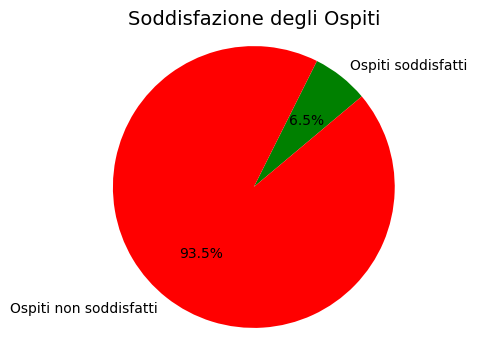

In [2]:
labels = ['Ospiti soddisfatti', 'Ospiti non soddisfatti']
# nomi delle due porzioni del grafico
sizes = [ospiti_soddisfatti, len(guest_ex)-ospiti_soddisfatti]
# quali sono i dati di cui tener conto
colors = ['green', 'red']
# colore delle due porzioni
plt.figure(figsize=(4, 4))
# grandezza figura
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=40)
# grafico a torta
plt.title('Soddisfazione degli Ospiti', fontsize=14)
# titolo e grandezza
plt.axis('equal')
# serve per far si che sia un cerchio
plt.show()
# utilizzo un grafico per mostrare il grado di soddifazione degli ospiti


# Customer preference:
customers are served in order of reservation (the customer
number indicates the order) and are allocated to the hotel based on their preference,
until the seats or customers are exhausted.


In [ ]:
# importo le librerie necessarie
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# importo i file excel necessari richiamando una funzione dal file modu.py
from modu import carica_file
hotel_ex, guest_ex, preferences_ex = carica_file()
# creo una nuova colonna 'rooms' in hotel_ex che sia uguale a quella definita come stanze disponibili
hotel_ex['stanze_disponibili']= hotel_ex['rooms'].copy()
# dictionary comprehension, cioè itero su ogni elemento della lista
# e per ogni elemento il nome diventa una chiave a cui assegno il valore 0
guadagni_hotel= {hotel: 0 for hotel in hotel_ex['hotel']}
# importo le variabili sempre da modu
from modu import stats
ospiti_allocati, stanze_occupate, hotel_occupati, ospiti_soddisfatti, allocazioni = stats()
# itero su ogni riga saltando ignorando l'indicie (_,) (iterrows è utilizzabile grazie alla libreria pandas)
for _, guest_row in guest_ex.iterrows():
    
    # estraggo per ogni riga il nome e lo sconto associati
    guest=guest_row['guest']
    discount=guest_row['discount']
    
    # faccio in modo che la variabile preferenze_ospite contenga le preferenze dell'ospite in questione
    preferenze_ospite= preferences_ex[preferences_ex['guest']==guest]
    
    # troviamo tra gli hotel preferiti dall'ospite quelli che hanno almeno una stanza disponibile e .isin verifica proprio ciascun elemento di una colonna
    # per trovare quelli che soddisfano la richiesta
    hotels_preferiti= preferenze_ospite[preferenze_ospite['hotel'].isin(hotel_ex[hotel_ex['stanze_disponibili']>0]['hotel'])]
    
    # se ci sono hotel disponibili tra quelli preferiti dal cliente
    if not hotels_preferiti.empty:
        
        # selezioniamo il primo hotel preferito con disponibilità e poi aggiungo 1 al numero degli ospiti soddisfatti
        hotel_selezionato= hotels_preferiti.iloc[0]['hotel']
        ospiti_soddisfatti += 1   
    else:
        # se non ci sono preferenze valide saltiamo l'ospite e non lo allochiamo
        continue
    
    
    # definisco il prezzo dell'hotel grazie ad .iloc che seleziona solo la prima riga
    # ottenuta dal filtraggio degli hotel
    prezzo_hotel=hotel_ex[hotel_ex['hotel']==hotel_selezionato].iloc[0]
    
    # definisco la variabli price
    price=prezzo_hotel['price']
    
    # calcolo lo sconto
    prezzo_finale= price*(1-discount)
    
    # aggiungo ogni volta un nuovo elemento alla lista allocazioni
    # il nuovo elemento è un dizionario che contiene le informazioni: cliente, hotel e prezzo
    allocazioni.append({
        'cliente': guest,
        'hotel_f':hotel_selezionato,
        'prezzo_pagato':prezzo_finale
        })
    
    # ottengo l'indice dell'hotel che soddisfa le condizioni indicate grazie a .index
    indice_hotel=hotel_ex[hotel_ex['hotel']==hotel_selezionato].index
    
    # riduco il numero di stanze disponibili dell'hotel selezionato
    # loc serve per avere un risultato in base ai nomi di righe e colonne invece che l'indice numerico come fa iloc
    hotel_ex.loc[indice_hotel, 'stanze_disponibili']-=1 
    
    # aggiorno le statistiche
    ospiti_allocati += 1
    stanze_occupate += 1
    # aggiungo all'insieme degli hotel occupati l'hotel selezionato
    hotel_occupati.add(hotel_selezionato)
    # aumento i guadagni di ogni singolo hotel in base a quello che viene selezionato di volta in volta
    guadagni_hotel[hotel_selezionato] += prezzo_finale
    
    # se tutti gli hotel sono pieni interrompo l'iterazione stampo il messaggio che voglio
    if hotel_ex['stanze_disponibili'].sum() == 0:
        print('Tutte le stanze sono occupate.')
        break
# creo un dataframe per allocazioni e per i guadagni
# quello dei guadagi sarà una tabella in cui verranno rappresentati gli hotel e i loro rispettivi guadagni
allocazioni_df_2=pd.DataFrame(allocazioni)
guadagni_df_2= pd.DataFrame(list(guadagni_hotel.items()), columns=['Hotel', 'Guadagno totale'])
# voglio un numero per gli hotel occupati
numero_hotel_occupati= len(hotel_occupati)
# f serve per poter inserire le variabili all'interno di una stringa
print(f'Numero di ospiti che hanno ottenuto una camera: {ospiti_allocati}')
print(f'Numero di stanze occupate: {stanze_occupate}')
print(f'Numero di hotel occupati: {numero_hotel_occupati}')
print(f'Numero di ospiti soddisfatti: {ospiti_soddisfatti}')
# n invece è utile per creare uno spazio vuoto tra questo che voglio stampare adesso e quello che ho stampato prima
print('\nGuadagni totali di ogni hotel:')
print(guadagni_df_2)
print('\nAllocazioni degli ospiti:')
print(allocazioni_df_2)

Numero di ospiti che hanno ottenuto una camera: 3975
Numero di stanze occupate: 3975
Numero di hotel occupati: 400
Numero di ospiti soddisfatti: 3975

Guadagni totali di ogni hotel:
         Hotel  Guadagno totale
0      hotel_1          3128.58
1      hotel_2          1207.96
2      hotel_3           816.39
3      hotel_4          2446.06
4      hotel_5          1904.22
..         ...              ...
395  hotel_396           949.76
396  hotel_397           690.20
397  hotel_398           944.52
398  hotel_399          1533.60
399  hotel_400           653.95

[400 rows x 2 columns]

Allocazioni degli ospiti:
         cliente    hotel_f  prezzo_pagato
0        guest_1  hotel_168         271.18
1        guest_2  hotel_369         133.00
2        guest_3  hotel_157          60.45
3        guest_4  hotel_235         136.00
4        guest_5  hotel_121          50.40
...          ...        ...            ...
3970  guest_3996  hotel_350          56.00
3971  guest_3997   hotel_19          96

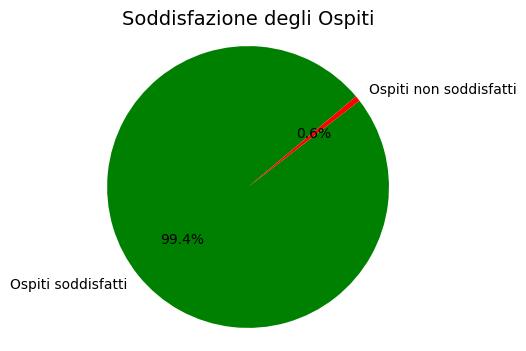

In [4]:
labels = ['Ospiti soddisfatti', 'Ospiti non soddisfatti']
# nomi delle due fette della torta
sizes = [ospiti_soddisfatti, len(guest_ex)-ospiti_soddisfatti]
# quantità delle due porzioni
colors = ['green', 'red']
# colori delle due porzioni
plt.figure(figsize=(4, 4))
# misura della figura
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=40)
# grafico a torta, dati in percentuali decimali
plt.title('Soddisfazione degli Ospiti', fontsize=14)
# titolo e grandezza
plt.axis('equal')
# deve essere circolare la torta
plt.show()
# comando per avere la figura

# Price:
the places in the hotel are distributed in order of price, starting with the cheapest
hotel and following in order of reservation and preference until the places or customers
are exhausted.

In [ ]:
# importo le varie librerie e i file necessari
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from modu import carica_file
hotel_ex, guest_ex, preferences_ex = carica_file()
# creo una nuova colonna (rooms) in quel file e la faccio uguale a quella delle stanze disponibili
hotel_ex['stanze_disponibili']=hotel_ex['rooms'].copy()
# ordino gli hotel in base al prezzo crescente
hotel_ex=hotel_ex.sort_values(by='price')
# creo un dizionario per i guadagni di ogni hotel
guadagni_hotel= {hotel: 0 for hotel in hotel_ex['hotel']}
# importo una funzione
from modu import stats
ospiti_allocati, stanze_occupate, hotel_occupati, ospiti_soddisfatti, allocazioni = stats()
# itero su ogni riga ignorando l'indice (_,)
for _, guest_row in guest_ex.iterrows():
    
    # estraggo per ogni riga il nome e lo sconto associati
    guest=guest_row['guest']
    discount=guest_row['discount']
    
    # faccio in modo che questa variabile contenga le preferenze dell'ospite in questione
    preferenze_ospite = preferences_ex[preferences_ex['guest'] == guest]
    
    # trovo tra le preferenze del cliente, in ordine, l'hotel più economico con almeno una stanza libera
    # grazie ad isin posso selezionare gli hotel con almeno una stanza libera tra quelli nelle preferenze, inoltre li avevo gia ordinati in base al prezzo grazie a sort
    hotels_preferiti=preferenze_ospite[preferenze_ospite['hotel'].isin(hotel_ex[hotel_ex['stanze_disponibili']>0]['hotel'])]
    
    if not hotels_preferiti.empty:
        # qua sto prendendo gli elementi di hotel preferiti e grazie a merge che prende
        # la colonna in comune tra hotels preferiti e hotel ex e poi aggiunge la colonna price a
        # hotels preferiti e li ordina in base al prezzo 
        hotels_preferiti=hotels_preferiti.merge(hotel_ex[['hotel', 'price']], on='hotel').sort_values(by='price')
        
        # seleziono il primo hotel (.iloc[0]) perchè so che in hotels preferiti prima li ho ordinati
        # in base al prezzo quindi il primo sarà quello col prezzo più basso
        hotel_selezionato=hotels_preferiti.iloc[0]['hotel']
        
        # se l'hotel selezionato è tra le preferenze dell'ospite posso aumentare il valore degli ospiti soddisfatti
        if hotel_selezionato in preferenze_ospite['hotel'].values:
            ospiti_soddisfatti += 1
    else:
        # se non ci sono preferenze valide skippiamo il cliente e non viene allocato
        continue
    
    # prendo il prezzo dell'hotel selezionato e calcolo lo sconto
    prezzo_hotel=hotel_ex[hotel_ex['hotel']==hotel_selezionato].iloc[0]['price']
    prezzo_finale=prezzo_hotel*(1-discount)
    
    # aggiungo ogni volta un nuovo elemento alla lista allocazioni
    # il nuovo elemento è un dizionario che contiene le informazioni: cliente, hotel e prezzo
    allocazioni.append({
        'cliente':guest,
        'hotel_f':hotel_selezionato,
        'prezzo_pagato':prezzo_finale
    })
    
    # trovo l'indice dalla riga di hotel_ex che corrisponde all'hotel selezionato
    indice_hotel=hotel_ex[hotel_ex['hotel']==hotel_selezionato].index
    
    # diminuisco di 1 le stanze disponibili nell'hotel da cui abbiamo trovato l'indice 
    # utilizziamo loc appunto per modificcare uno specifico valore all'interno di hotel_ex
    hotel_ex.loc[indice_hotel, 'stanze_disponibili'] -=1
    
    # aggiorno le statistiche
    ospiti_allocati+=1
    stanze_occupate+=1
    
    # aggiungo all'insieme degli hotel occupati l'hotel selezionato
    hotel_occupati.add(hotel_selezionato)
    
    # aumento i guadagni di ogni singolo hotel in base a quello che viene selezionato di volta in volta
    guadagni_hotel[hotel_selezionato] += prezzo_finale
    
    # se non ci sono stanze disponibili in nessun hotel interrompo il loop
    if hotel_ex['stanze_disponibili'].sum()==0:
        print('Stanze sold out')
        break
# creo i dataframe
allocazioni_df_3 = pd.DataFrame(allocazioni)
guadagni_df_3=pd.DataFrame(list(guadagni_hotel.items()), columns=['Hotel', 'Guadagno Totale'])
numero_hotel_occupati= len(hotel_occupati)
# f mi serve per inserire variabili all'interno di stringe
print(f'Nuero di ospiti che hanno ottenuto una camera: {ospiti_allocati}')
print(f'Numero di stanze occupate: {stanze_occupate}')
print(f'Numero di hotel occupati: {numero_hotel_occupati}')
print(f'Numero di ospiti soddisfatti: {ospiti_soddisfatti}')
# n mi permette di separare con una riga vuota quello che stampo da quello che ho stampato subito prima
print('\nGuadagni totali di ogni hotel:')
print(guadagni_df_3)
print('\nAllocazioni degli ospiti:')
print(allocazioni_df_3)

Nuero di ospiti che hanno ottenuto una camera: 3926
Numero di stanze occupate: 3926
Numero di hotel occupati: 388
Numero di ospiti soddisfatti: 3926

Guadagni totali di ogni hotel:
         Hotel  Guadagno Totale
0    hotel_190           465.00
1     hotel_49           860.50
2    hotel_354           579.80
3    hotel_301           299.00
4     hotel_24           428.77
..         ...              ...
395  hotel_184             0.00
396    hotel_5             0.00
397  hotel_168           265.22
398  hotel_230             0.00
399   hotel_27           254.15

[400 rows x 2 columns]

Allocazioni degli ospiti:
         cliente    hotel_f  prezzo_pagato
0        guest_1   hotel_22          55.51
1        guest_2   hotel_26          55.00
2        guest_3    hotel_6          53.94
3        guest_4  hotel_321          54.00
4        guest_5  hotel_121          50.40
...          ...        ...            ...
3921  guest_3996  hotel_115         244.00
3922  guest_3997  hotel_147         213.

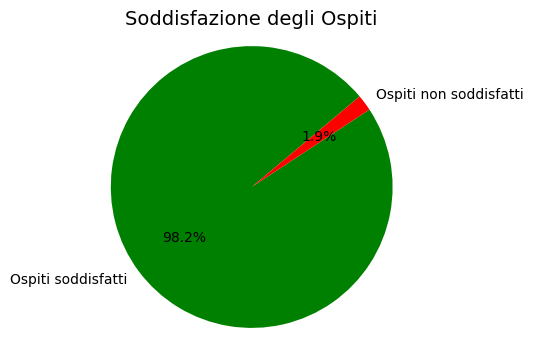

In [6]:
# nome delle porzioni del grafico 
labels = ['Ospiti soddisfatti', 'Ospiti non soddisfatti']
# varaibili che rappresentano le due porzioni 
sizes = [ospiti_soddisfatti, len(guest_ex)-ospiti_soddisfatti]
# colori delle porzioni
colors = ['green', 'red']
# grandezza della figura
plt.figure(figsize=(4, 4))
# grafico a torta in percentuali decimali
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=40)
# titolo
plt.title('Soddisfazione degli Ospiti', fontsize=14)
# deve essere un cerchio
plt.axis('equal')
# comando per ottenere il grafico
plt.show()

# Availability:
places in hotels are distributed in order of room availability, starting with the
most roomy hotel and subordinately in order of reservation and preference until places
or clients are exhausted.

In [ ]:
# importo le varie librerie e i file necessari
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from modu import carica_file
hotel_ex, guest_ex, preferences_ex = carica_file()
# creo una nuova colonna (rooms) in quel file e la faccio uguale a quella delle stanze disponibili
hotel_ex['stanze_disponibili']=hotel_ex['rooms'].copy()
# ordino gli hotel in base alla disponibilità delle stanze, parto da quello con più stanze
hotel_ex=hotel_ex.sort_values(by='stanze_disponibili', ascending=False)
# creo il dizionario per i guadagni degli hotel
guadagni_hotel={hotel: 0 for hotel in hotel_ex['hotel']}
# importo le variabili
from modu import stats
ospiti_allocati, stanze_occupate, hotel_occupati, ospiti_soddisfatti, allocazioni = stats()
# itero su ogni riga di guest ex ignorando l'indice(_,)
for _, guest_row in guest_ex.iterrows():
    
    # estraggo da ogni riga il valore corrispondente di guest e discount e li assegno alle variabili
    guest=guest_row['guest']
    discount=guest_row['discount']
    
    # filtro preferences_ex in modo tale che mi restituisca solo la riga in cui il valore
    # della colonna guest è uguale alla variabile guest
    preferenze_ospite=preferences_ex[preferences_ex['guest']==guest]
    
    # seleziono da hotel_ex gli hotel con almeno una stanza disponibile
    # estraggo solo la colonna hotel e verifico se c'è corrispondenza 
    # tra gli hotel preferiti dall'ospite  e quelli ottenuti, quindi creo hotels_preferiti
    hotels_preferiti=preferenze_ospite[preferenze_ospite['hotel'].isin(hotel_ex[hotel_ex['stanze_disponibili']>0]['hotel'])]
    
    # se non è vuoto procedo altrimenti skippo questa parte
    if not hotels_preferiti.empty:
        
        # cerco di allocare l'ospite nell'hotel preferrito che ha più stanze disponibili
        # merge è come un join in sql e ci serve in questo caso per unire due colonne che hanno in comune 
        # la colonna hotel in modo tale che la scelta possa essere fatta in base alla richiesta specificata prima
        hotels_preferiti=hotels_preferiti.merge(hotel_ex[['hotel', 'stanze_disponibili']], on='hotel').sort_values(by='stanze_disponibili', ascending=False)
        
        # seleziono il primo hotel preferito (.iloc[0]) con più disponibilità di stanze
        hotel_selezionato=hotels_preferiti.iloc[0]['hotel']
        
        # aumento il numero di ospiti soddisfatti
        ospiti_soddisfatti += 1 
    else:
        continue
    
    # seleziono il valore nella colonna price della prima riga in cui hotel selezionato
    # è uguale al valore nella colonna hotel della riga di hotel_ex in questione
    prezzo_hotel=hotel_ex[hotel_ex['hotel']== hotel_selezionato].iloc[0]['price']
    
    # calcolo lo sconto
    prezzo_finale=prezzo_hotel*(1-discount)
    
    # aggiungo ogni volta un nuovo elemento alla lista allocazioni
    # il nuovo elemento è un dizionario che contiene le informazioni: cliente, hotel e prezzo
    allocazioni.append({
        'cliente':guest,
        'hotel_f':hotel_selezionato,
        'prezzo_pagato':prezzo_finale
    })
    
    # .index mi restituisce l'indice della riga in cui il valore della colonna hotel è uguale a hotel selezionato
    indice_hotel=hotel_ex[hotel_ex['hotel']==hotel_selezionato].index
    
    # riduco il numero di stanze disponibili, .loc invece serve per filtrare secondo un etichetta
    # in questo caso filtriamo attraerso indice hotel
    hotel_ex.loc[indice_hotel, 'stanze_disponibili'] -= 1
    
    # aggiorno le statistiche delle variabili
    ospiti_allocati += 1
    guadagni_hotel[hotel_selezionato] += prezzo_finale
    stanze_occupate += 1
    
    # aggiungo al'insieme l'hotel selezionato ogni volta
    hotel_occupati.add(hotel_selezionato)
    
    # se non ci sono stanze disponibili interrompere il loop
    if hotel_ex['stanze_disponibili'].sum() ==0:
        print('Tutte le stanze sono occupate')
        break
# creo i dataframe, in quello dei gudagni voglio che sia creata una tabella
# in cui siano riportati gli hotel e i rispettivi guadagni totali
allocazioni_df_4 = pd.DataFrame(allocazioni)
guadagni_df_4 = pd.DataFrame(list(guadagni_hotel.items()), columns=['Hotel', 'Guadagno totale'])
# variabile che indica il numero degli hotel occuapti
numero_hotel_occupati = len(hotel_occupati)
# f mi serve per inserire una variabile in una stringa
print(f'Numero di ospiti che hanno ottenuto una camera: {ospiti_allocati}')
print(f'Numero di stanze occupate: {stanze_occupate}')
print(f'Numero di hotel occupati: {numero_hotel_occupati}')
print(f'Numero di ospiti soddisfatti: {ospiti_soddisfatti}')
# n invece mi serve per lasciare una riga vuota tra quello che sto stampando ora e quello che ho stampato
# immediatamente prima
print('\nGuadagni totali di ogni hotel:')
print(guadagni_df_4)
print('\nAllocazioni degli ospiti:')
print(allocazioni_df_4)

Numero di ospiti che hanno ottenuto una camera: 4000
Numero di stanze occupate: 4000
Numero di hotel occupati: 400
Numero di ospiti soddisfatti: 4000

Guadagni totali di ogni hotel:
         Hotel  Guadagno totale
0     hotel_52          2559.96
1    hotel_114          2760.78
2     hotel_49           776.50
3    hotel_378          3053.56
4    hotel_115          3862.52
..         ...              ...
395  hotel_289           781.75
396  hotel_219           229.10
397  hotel_291           294.25
398   hotel_40           350.84
399  hotel_357           459.36

[400 rows x 2 columns]

Allocazioni degli ospiti:
         cliente    hotel_f  prezzo_pagato
0        guest_1  hotel_129          77.35
1        guest_2  hotel_114         178.00
2        guest_3  hotel_122         155.31
3        guest_4  hotel_394         291.00
4        guest_5  hotel_305          66.60
...          ...        ...            ...
3995  guest_3996  hotel_350          56.00
3996  guest_3997   hotel_19          96

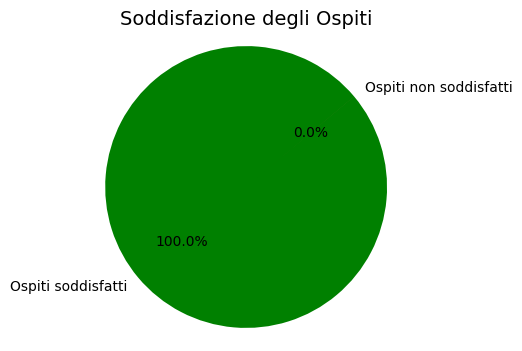

In [8]:
# nome delle porzioni del grafico a torta
labels = ['Ospiti soddisfatti', 'Ospiti non soddisfatti']
# necessito di questo condizionamento perchè altrimenti ci sarebbero problemi nel viualizzare il grafico
sizes = [ospiti_soddisfatti, len(guest_ex)-ospiti_soddisfatti]
if sizes[1] == 0:
    sizes[1] = 0.1
# i colori delle due porzioni
colors = ['green', 'red']
# grandezza del grafico
plt.figure(figsize=(4, 4))
# grafico a torta, con percentuali decimali
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=40)
# titolo del grafico
plt.title('Soddisfazione degli Ospiti', fontsize=14)
# deve essere un cerchio il grafico a torta
plt.axis('equal')
# comando per visualizzare l'immagine del grafico
plt.show()

# Graph of comparison:
**This last graphic shows which method has the best percentage of satisfaction in relation to the different methods required for allocating**

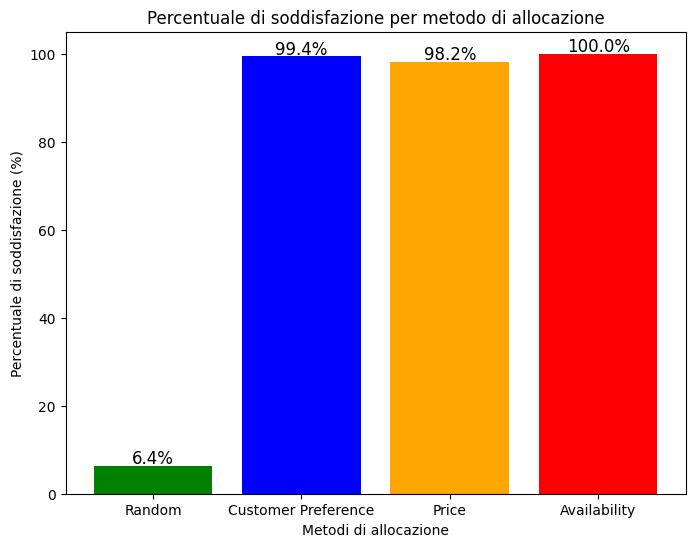

In [9]:
import matplotlib.pyplot as plt
metodi = ['Random', 'Customer Preference', 'Price', 'Availability']
ospiti_soddisfatti = [255, 3975, 3926, 4000]
ospiti_totali = 4000
percentuale_soddisfatti = [soddisfatti / ospiti_totali * 100 for soddisfatti in ospiti_soddisfatti]
plt.figure(figsize=(8, 6))
plt.bar(metodi, percentuale_soddisfatti, color=['green', 'blue', 'orange', 'red'])
plt.xlabel('Metodi di allocazione')
plt.ylabel('Percentuale di soddisfazione (%)')
plt.title('Percentuale di soddisfazione per metodo di allocazione')
for i in range(len(percentuale_soddisfatti)):
    plt.text(i, percentuale_soddisfatti[i] + 0.5, f'{percentuale_soddisfatti[i]:.1f}%', ha='center', fontsize=12)
# creo questo loop per far si che il grafico sia ordinato e di facile comprensione
# aggiungo alla percentuale soddisfatti 0.5 in modo tale che la percentuale venga rappresentata
# un po più sopra risoetto al rettangolo che indica la percentuale appunto
# inoltre voglio che la percentuale sia decimale 
plt.show()

# Result: 
**We can observe that even if we are considering the preferences as our method of evaluation the better way to allocate guest in this case is using the 'Availability', which gives a 100% of satisfaction trough guests**